# Missing Value Handling

In [38]:
import pandas as pd
import missingno as msno
import seaborn as sns

from sklearn import datasets

# Load Dataset

In [39]:
#load the diabetes dataset from csv into a dataframe
df = pd.read_csv('diabetes_prepared.csv')
df                   


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-1.437266,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.052926,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.904603,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.174244,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.893379,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,0.178177,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.128460,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,-0.116836,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,-0.349337,220.0


# Data Exploration

In [40]:
#show descriptive statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7,label
count,4.420000e+02,430.000000,430.000000,430.000000,240.000000,430.000000,424.000000,430.000000,4.420000e+02,4.420000e+02,396.000000,442.000000
mean,-7.284269e-18,0.000137,-0.001190,-0.000482,-0.002503,0.000124,-0.000320,-0.000245,9.143013e-17,1.431736e-17,-0.000121,152.133484
std,4.761905e-02,0.047629,0.046959,0.047481,0.047344,0.047790,0.046751,0.047461,4.761905e-02,4.761905e-02,0.973882,77.093005
min,-1.072256e-01,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-1.260971e-01,-1.377672e-01,-3.614583,25.000000
25%,-3.729927e-02,-0.044642,-0.035307,-0.036656,-0.037344,-0.029967,-0.032356,-0.039493,-3.324559e-02,-3.317903e-02,-0.562162,87.000000
50%,5.383060e-03,-0.044642,-0.008362,-0.005670,-0.005697,-0.003819,-0.006584,-0.002592,-1.947171e-03,-1.077698e-03,0.010553,140.500000
75%,3.807591e-02,0.050680,0.029901,0.033053,0.024918,0.029140,0.026550,0.034309,3.243232e-02,2.791705e-02,0.627720,211.500000
max,1.107267e-01,0.050680,0.170555,0.132044,0.127771,0.198788,0.177497,0.185234,1.335973e-01,1.356118e-01,3.133093,346.000000


In [41]:
#count missing values
df.isnull().sum()


age        0
sex       12
bmi       12
bp        12
s1       202
s2        12
s3        18
s4        12
s5         0
s6         0
s7        46
label      0
dtype: int64

<Axes: >

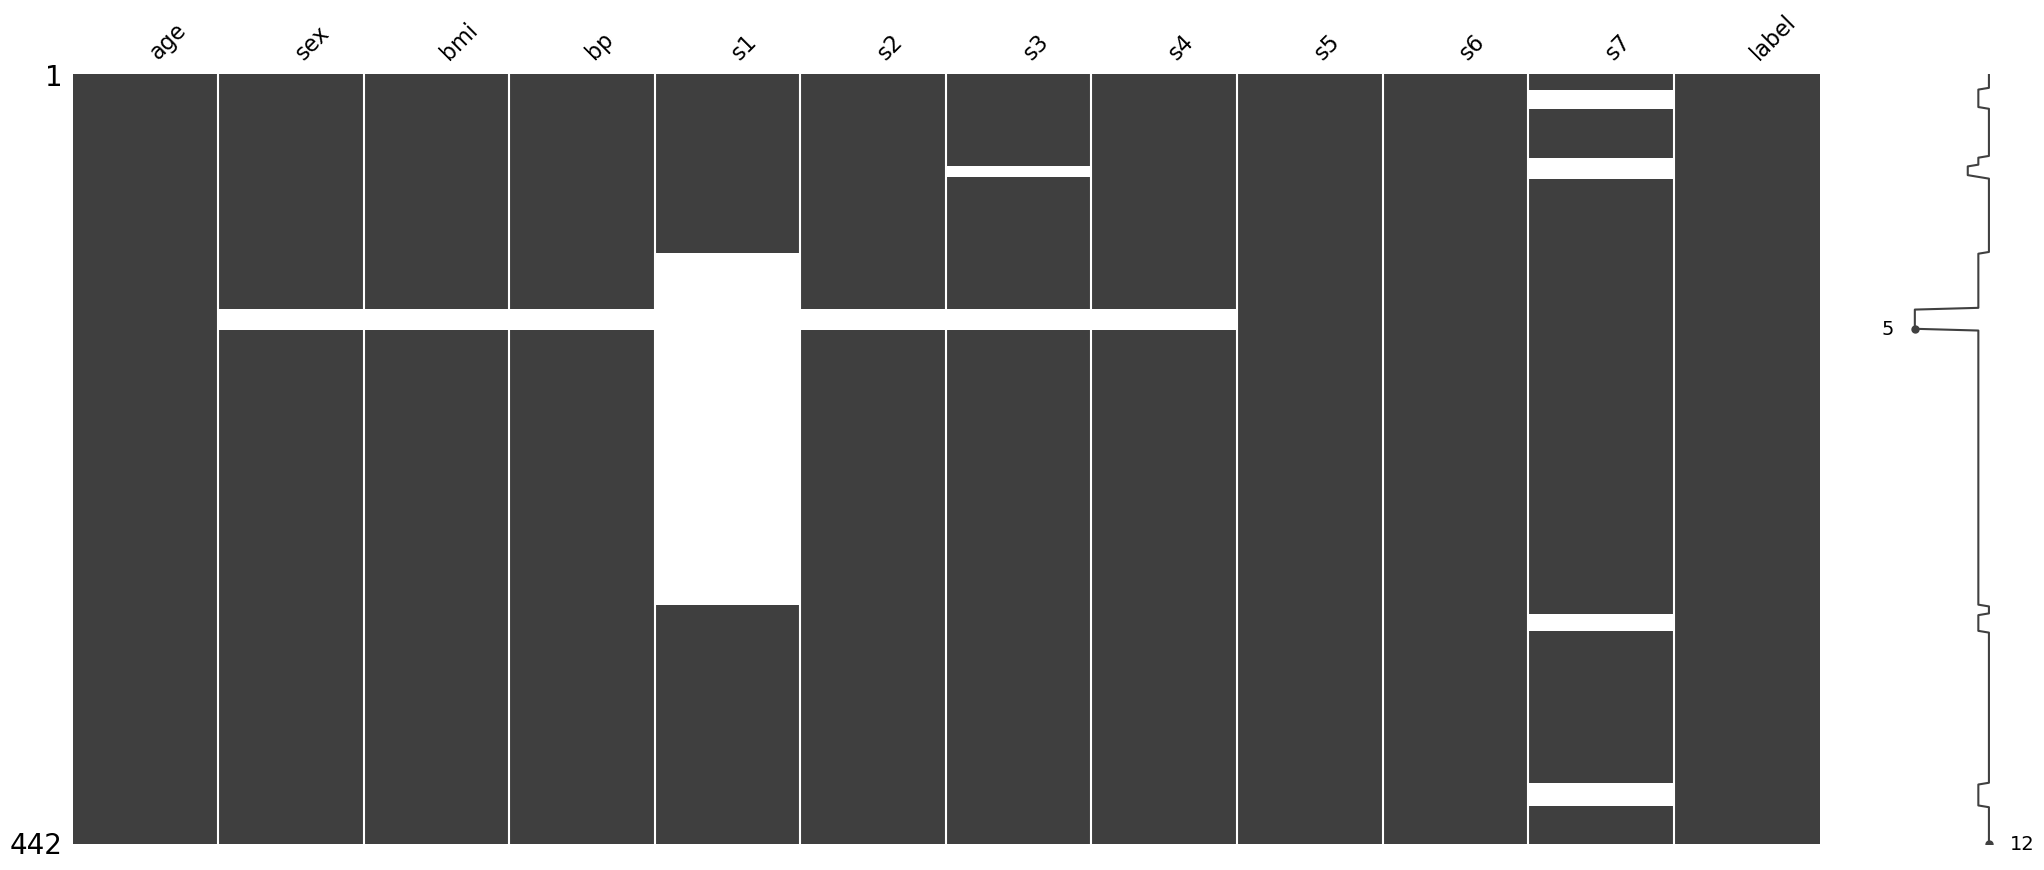

In [42]:
#visualize missing values
msno.matrix(df)

In [43]:
#show rows with more than two columns with missing values
df[df.isnull().sum(axis=1)>2]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7,label
135,-0.005515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050782,0.056912,0.587080,272.0
136,-0.092695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066490,-0.021788,-0.031480,85.0
137,0.005383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017036,-0.013504,-0.941550,280.0
138,0.034443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028020,0.073480,0.091419,336.0
139,0.023546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054720,-0.005220,-0.005236,281.0
140,0.041708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.033246,0.015491,-0.354536,118.0
141,-0.027310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045067,0.131470,0.363974,317.0
142,0.041708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045604,-0.001078,0.742585,235.0
143,-0.030942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.041176,-0.042499,-0.333195,60.0
144,0.030811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006207,0.007207,0.269774,174.0


# Missing Value Handling - Listwise Deletion

Deletion of entire row of data. If a row contains a lot of missing values and/or label is a missing.

In [44]:
#Listwise deletion (if label is missing))
df=df.drop(df[df['label'].isnull()].index)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-1.437266,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.052926,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.904603,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.174244,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.893379,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,0.178177,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.128460,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,-0.116836,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,-0.349337,220.0


In [45]:
#Listwise deletion (all rows with multiple missing values)
df=df.drop(df[df.isnull().sum(axis=1)>2].index)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-1.437266,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.052926,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.904603,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.174244,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.893379,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,0.178177,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.128460,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,-0.116836,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,-0.349337,220.0


<Axes: >

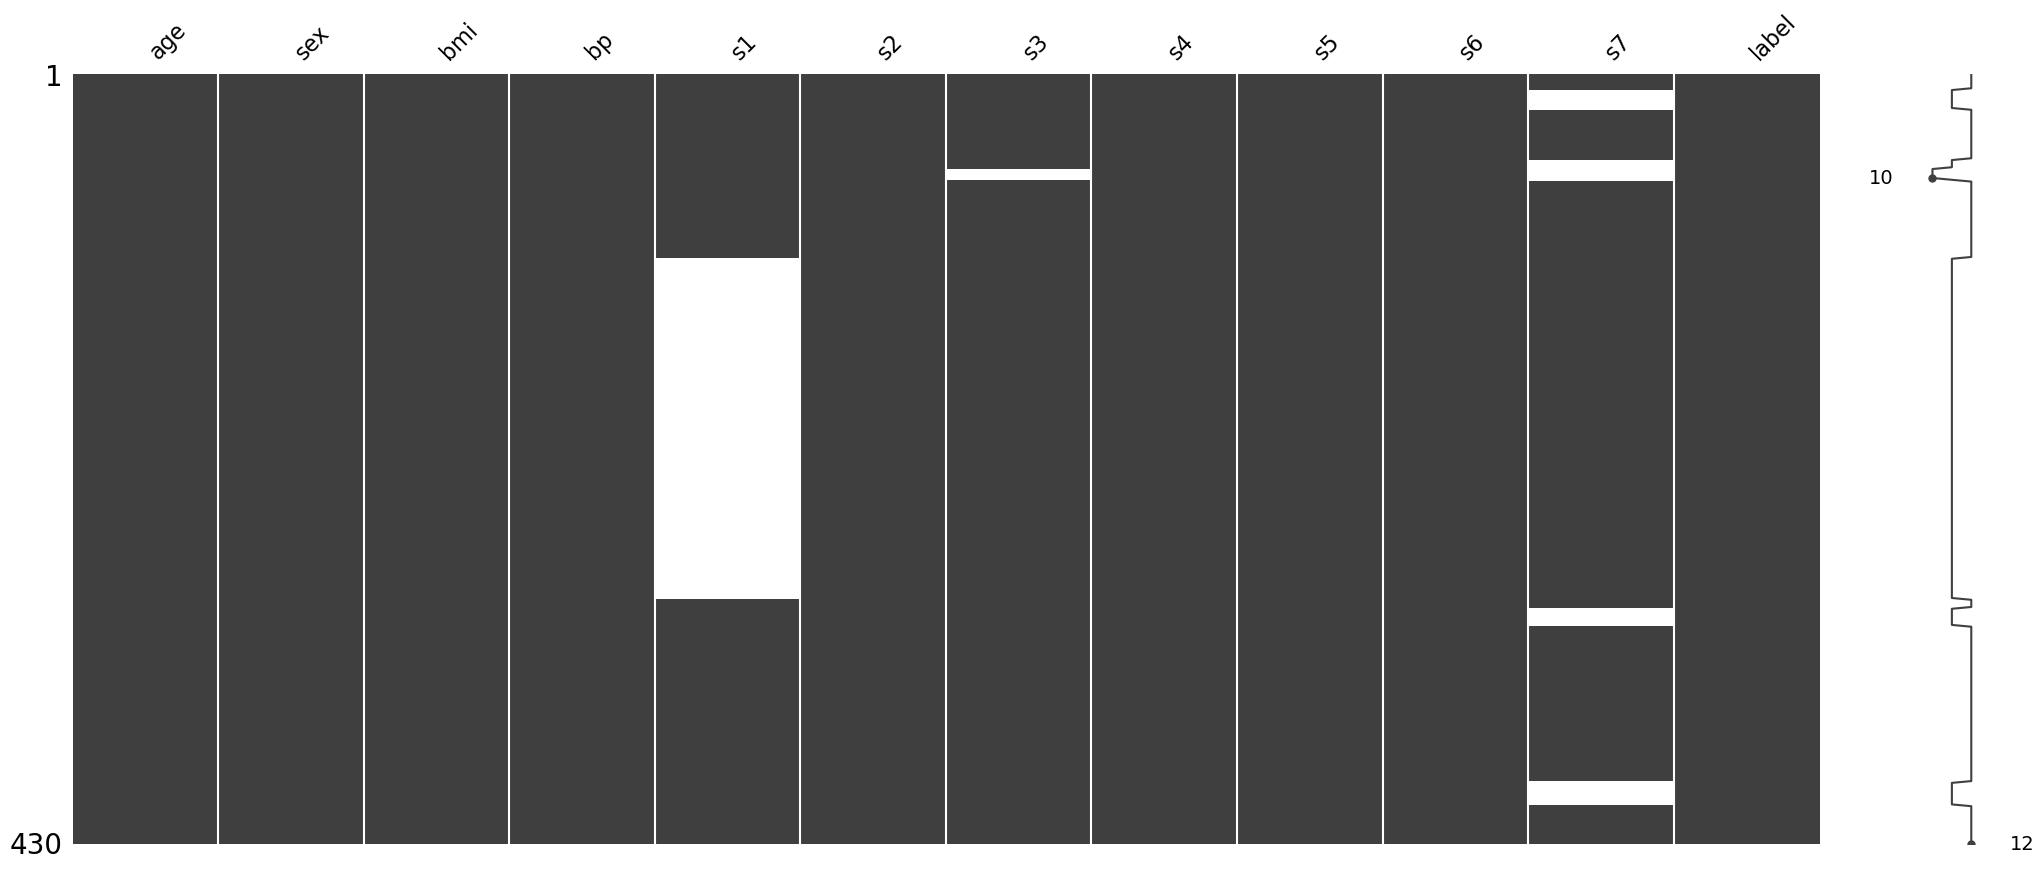

In [46]:
msno.matrix(df)

# Missing Value Handling - Feature Deletion

In [47]:
#Delete feature petal length (cm) due to large number of missing values
df=df.drop('s1',axis=1)
df


,age,sex,bmi,bp,s2,s3,s4,s5,s6,s7,label
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-1.437266,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.052926,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.904603,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.174244,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.893379,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002566,-0.028674,-0.002592,0.031193,0.007207,0.178177,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.079165,-0.028674,0.034309,-0.018114,0.044485,1.128460,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,-0.116836,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.015283,-0.028674,0.026560,0.044529,-0.025930,-0.349337,220.0


<Axes: >

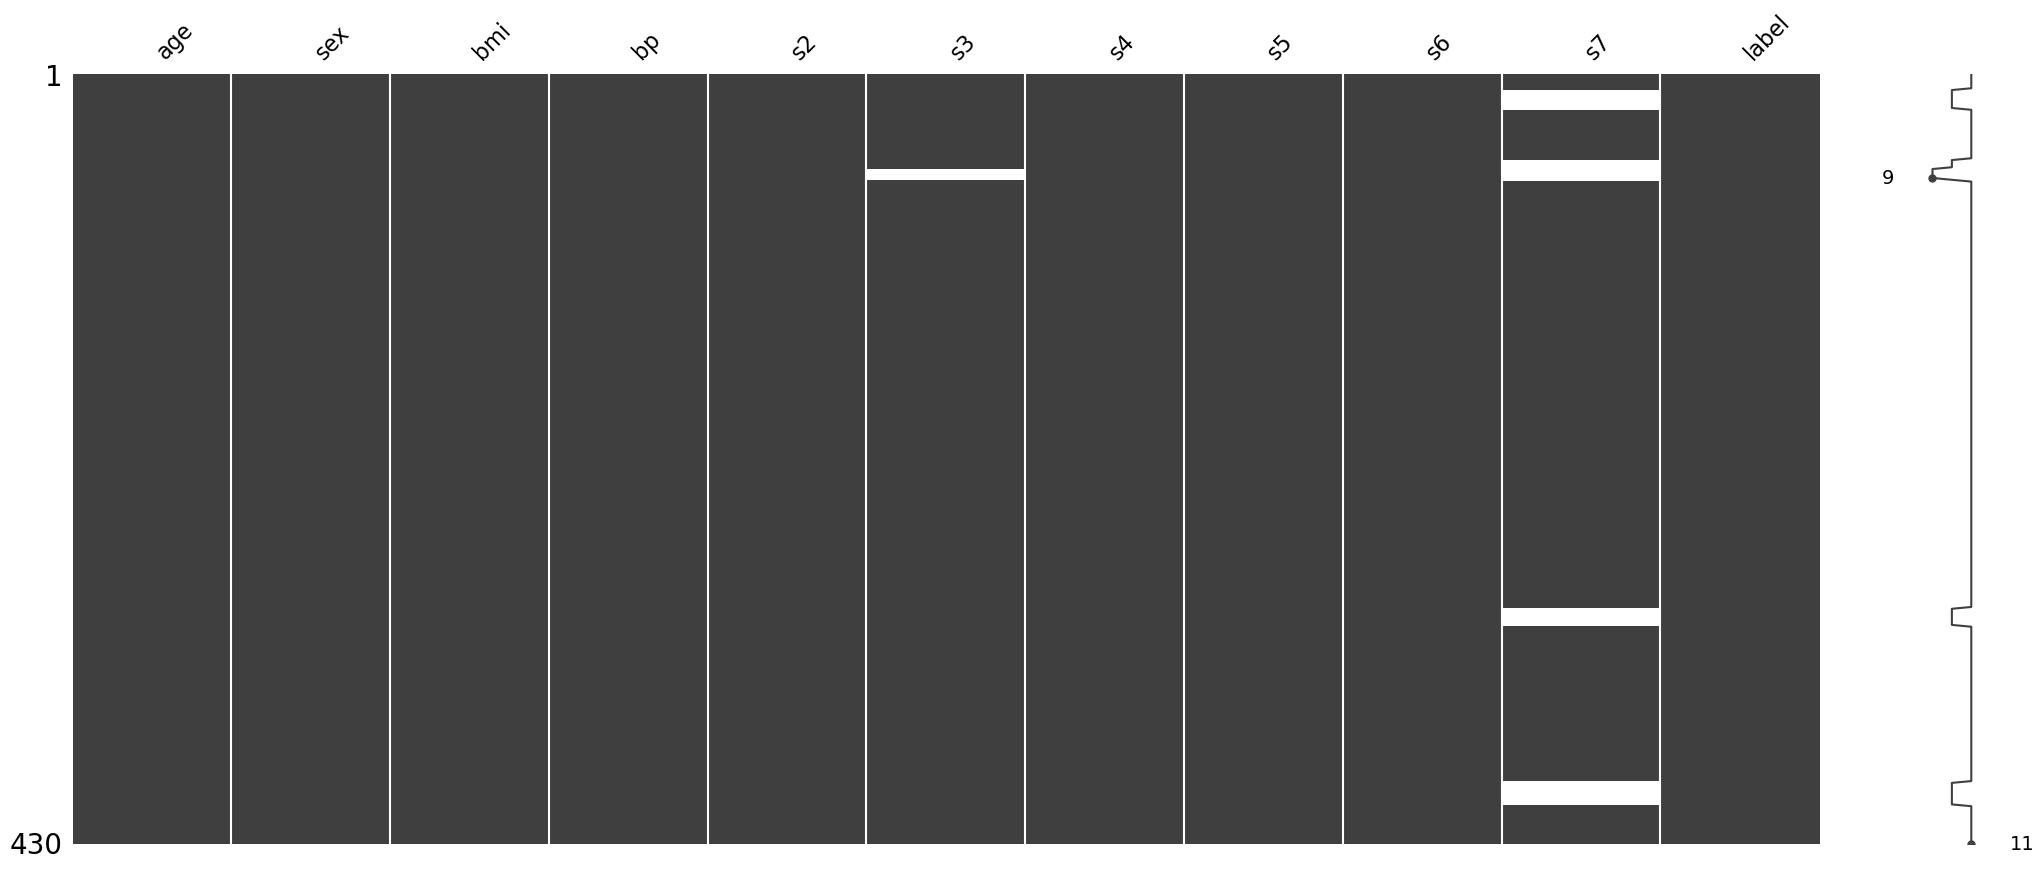

In [48]:
msno.matrix(df)

<Axes: >

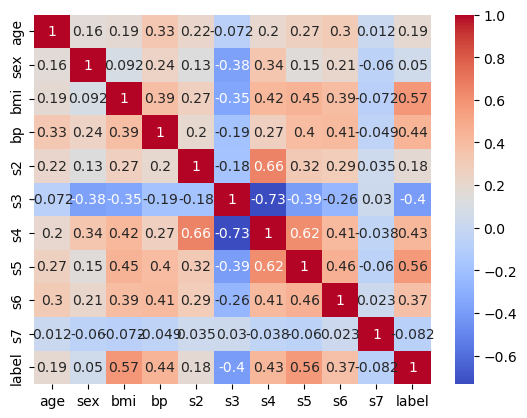

In [49]:
#calculate correlation matrix and visualize with coolwarm color map
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)


# Missing Value Handling - Average Imputation

If a feature shall be used for prediction, is not collinear and does not show systematic missings (MAR, NMAR)

The feature "s7" should not show correlations / collinerarity to other features

In [50]:
# displaying examples with missing values in feature "leaflets"
s7_MV= df[df['s7'].isnull()]
s7_MV

,age,sex,bmi,bp,s2,s3,s4,s5,s6,s7,label
9,-0.070900,-0.044642,0.039062,-0.033213,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,NaN,310.0
10,-0.096328,-0.044642,-0.083808,0.008101,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,NaN,101.0
11,0.027178,0.050680,0.017506,-0.033213,0.045972,-0.065491,0.071210,-0.096435,-0.059067,NaN,69.0
12,0.016281,-0.044642,-0.028840,-0.009113,-0.009769,0.044958,-0.039493,-0.030748,-0.042499,NaN,179.0
13,0.005383,0.050680,-0.001895,0.008101,-0.015719,-0.002903,-0.002592,0.038394,-0.013504,NaN,185.0
14,0.045341,-0.044642,-0.025607,-0.012556,-0.000061,0.081775,-0.039493,-0.031988,-0.075636,NaN,118.0
15,-0.052738,0.050680,-0.018062,0.080401,0.107662,-0.039719,0.108111,0.036060,-0.042499,NaN,171.0
16,-0.005515,-0.044642,0.042296,0.049415,-0.023861,0.074412,-0.039493,0.052277,0.027917,NaN,166.0
17,0.070769,0.050680,0.012117,0.056301,0.049416,-0.039719,0.034309,0.027364,-0.001078,NaN,144.0
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.019476,-0.028674,-0.002592,-0.018114,-0.017646,NaN,97.0


In [52]:
#store ids of rows with missing values in feature "random"
missing_values_ids = s7_MV.index.values
missing_values_ids

#replace missing values in feature "random" with mean
df['s7'].fillna(df['s7'].mean(), inplace=True)
#df['s7'].fillna(df['s7'].median(), inplace=True)

#show rows with missing_values_ids
df[df.index.isin(missing_values_ids)]

,age,sex,bmi,bp,s2,s3,s4,s5,s6,s7,label
9,-0.070900,-0.044642,0.039062,-0.033213,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,0.010553,310.0
10,-0.096328,-0.044642,-0.083808,0.008101,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,0.010553,101.0
11,0.027178,0.050680,0.017506,-0.033213,0.045972,-0.065491,0.071210,-0.096435,-0.059067,0.010553,69.0
12,0.016281,-0.044642,-0.028840,-0.009113,-0.009769,0.044958,-0.039493,-0.030748,-0.042499,0.010553,179.0
13,0.005383,0.050680,-0.001895,0.008101,-0.015719,-0.002903,-0.002592,0.038394,-0.013504,0.010553,185.0
14,0.045341,-0.044642,-0.025607,-0.012556,-0.000061,0.081775,-0.039493,-0.031988,-0.075636,0.010553,118.0
15,-0.052738,0.050680,-0.018062,0.080401,0.107662,-0.039719,0.108111,0.036060,-0.042499,0.010553,171.0
16,-0.005515,-0.044642,0.042296,0.049415,-0.023861,0.074412,-0.039493,0.052277,0.027917,0.010553,166.0
17,0.070769,0.050680,0.012117,0.056301,0.049416,-0.039719,0.034309,0.027364,-0.001078,0.010553,144.0
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.019476,-0.028674,-0.002592,-0.018114,-0.017646,0.010553,97.0


<Axes: >

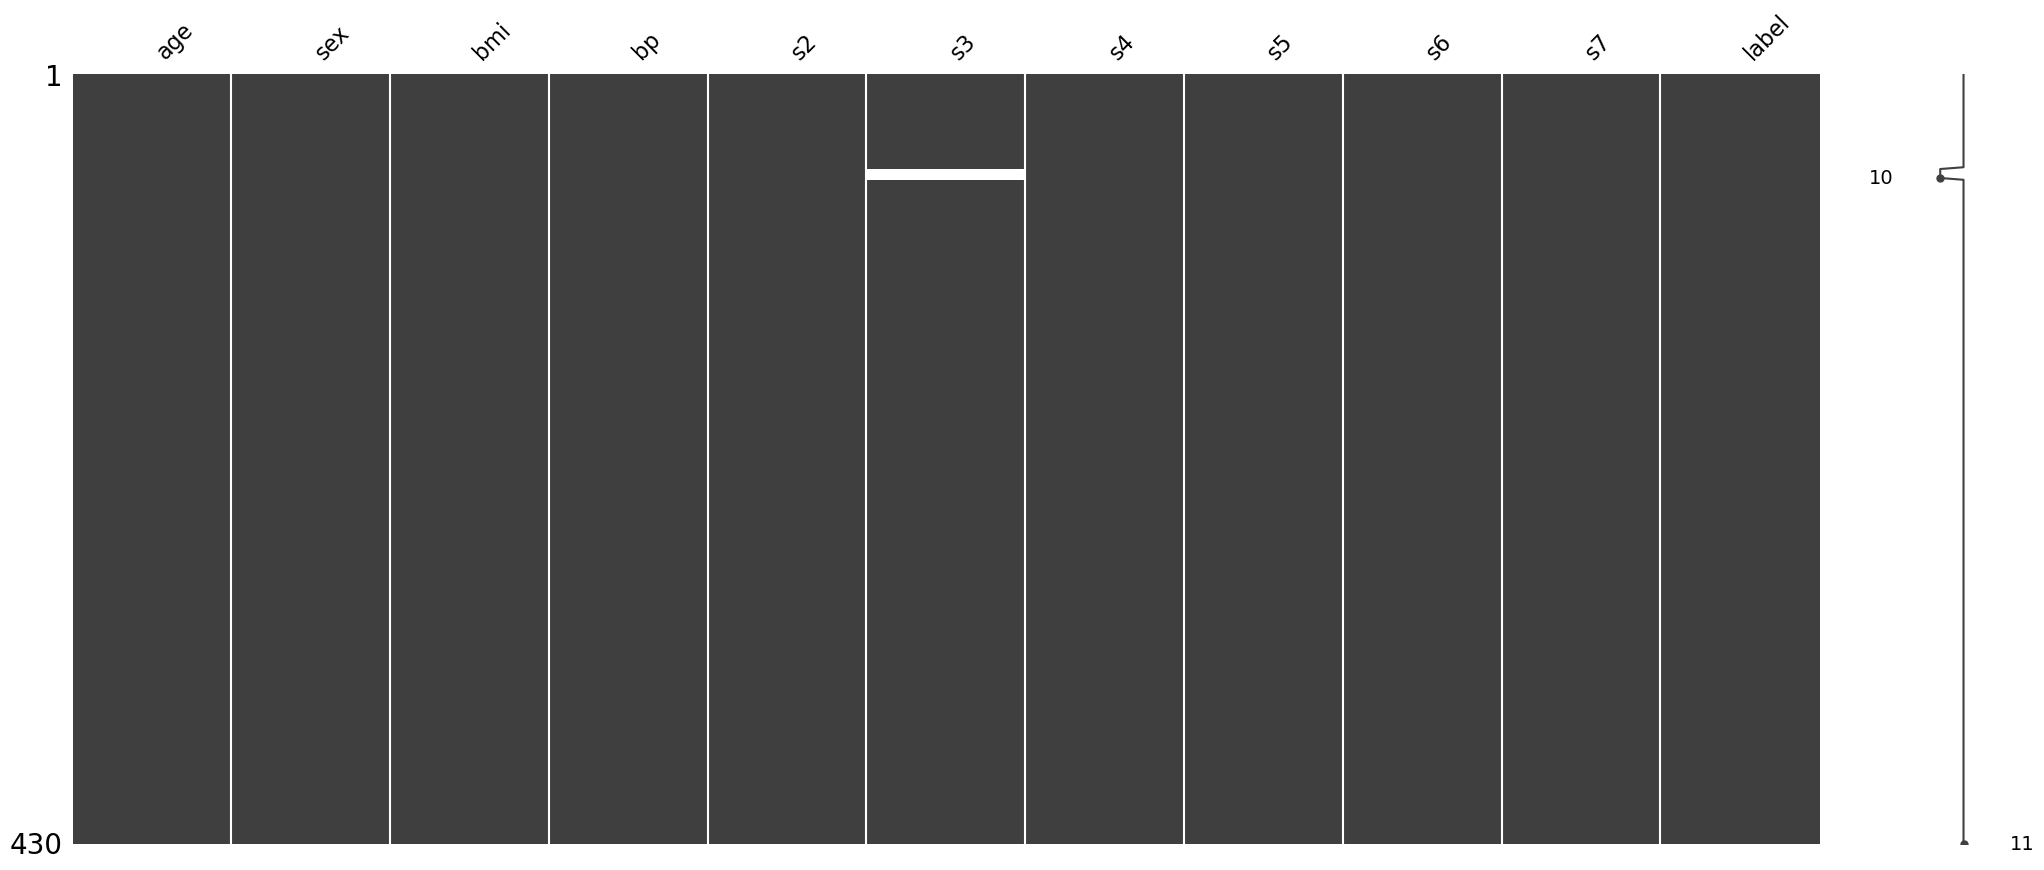

In [53]:
msno.matrix(df)

# Missing Value Handling - Regression Imputation

<Axes: >

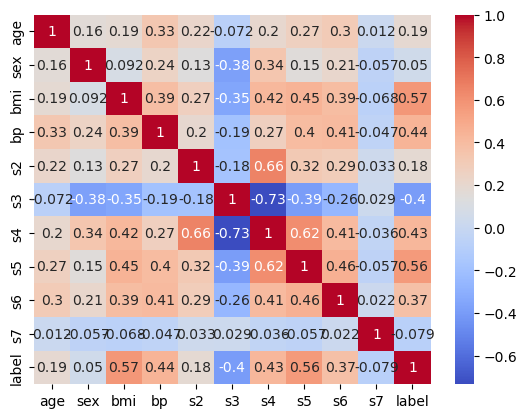

In [54]:
#calculate correlation matrix and visualize with coolwarm color map
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

In [55]:
from sklearn import linear_model

#Use colinearity to impute missing values for feature "s3" using colinear features feature "s4, s5 and s6"
reg = linear_model.LinearRegression()

#store ids of rows without missing values in feature "s3"
ids = df[df['s3'].notnull()].index.values

#train regression model, only use rows without missing values
reg.fit(df.loc[ids, ['s4','s5', 's6']], df.loc[ids, 's3'])

#show rows with missing values in feature "s3"
df[df['s3'].isnull()]

,age,sex,bmi,bp,s2,s3,s4,s5,s6,s7,label
53,-0.009147,-0.044642,-0.015906,0.070072,0.022172,NaN,-0.002592,-0.033246,0.048628,0.010553,104.0
54,-0.049105,-0.044642,0.025051,0.008101,0.017788,NaN,-0.039493,-0.041176,0.007207,0.010553,182.0
55,-0.041840,-0.044642,-0.049318,-0.036656,-0.022608,NaN,-0.039493,-0.066490,0.007207,0.010553,128.0
56,-0.041840,-0.044642,0.041218,-0.026328,-0.030437,NaN,0.002943,0.033654,-0.017646,0.010553,52.0
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.104340,NaN,-0.076395,-0.056153,-0.067351,0.010553,37.0
58,0.041708,-0.044642,-0.064408,0.035644,-0.057994,NaN,-0.076395,-0.000612,-0.050783,0.010553,170.0


In [56]:
#predict missing values using regression model trained on petal width (cm)
df.loc[~df.index.isin(ids), 's3'] = reg.predict(df.loc[~df.index.isin(ids), ['s4','s5', 's6']])

#explaination: [~df.index.isin(ids)] creates a mask, in which all rows with a MVs for "s3" get the value "True"

In [57]:
#show rows with imputed values
df.loc[~df.index.isin(ids)]

,age,sex,bmi,bp,s2,s3,s4,s5,s6,s7,label
53,-0.009147,-0.044642,-0.015906,0.070072,0.022172,-0.000003,-0.002592,-0.033246,0.048628,0.010553,104.0
54,-0.049105,-0.044642,0.025051,0.008101,0.017788,0.027519,-0.039493,-0.041176,0.007207,0.010553,182.0
55,-0.041840,-0.044642,-0.049318,-0.036656,-0.022608,0.025214,-0.039493,-0.066490,0.007207,0.010553,128.0
56,-0.041840,-0.044642,0.041218,-0.026328,-0.030437,0.000258,0.002943,0.033654,-0.017646,0.010553,52.0
57,-0.027310,-0.044642,-0.063330,-0.050427,-0.104340,0.053670,-0.076395,-0.056153,-0.067351,0.010553,37.0
58,0.041708,-0.044642,-0.064408,0.035644,-0.057994,0.059093,-0.076395,-0.000612,-0.050783,0.010553,170.0


<Axes: >

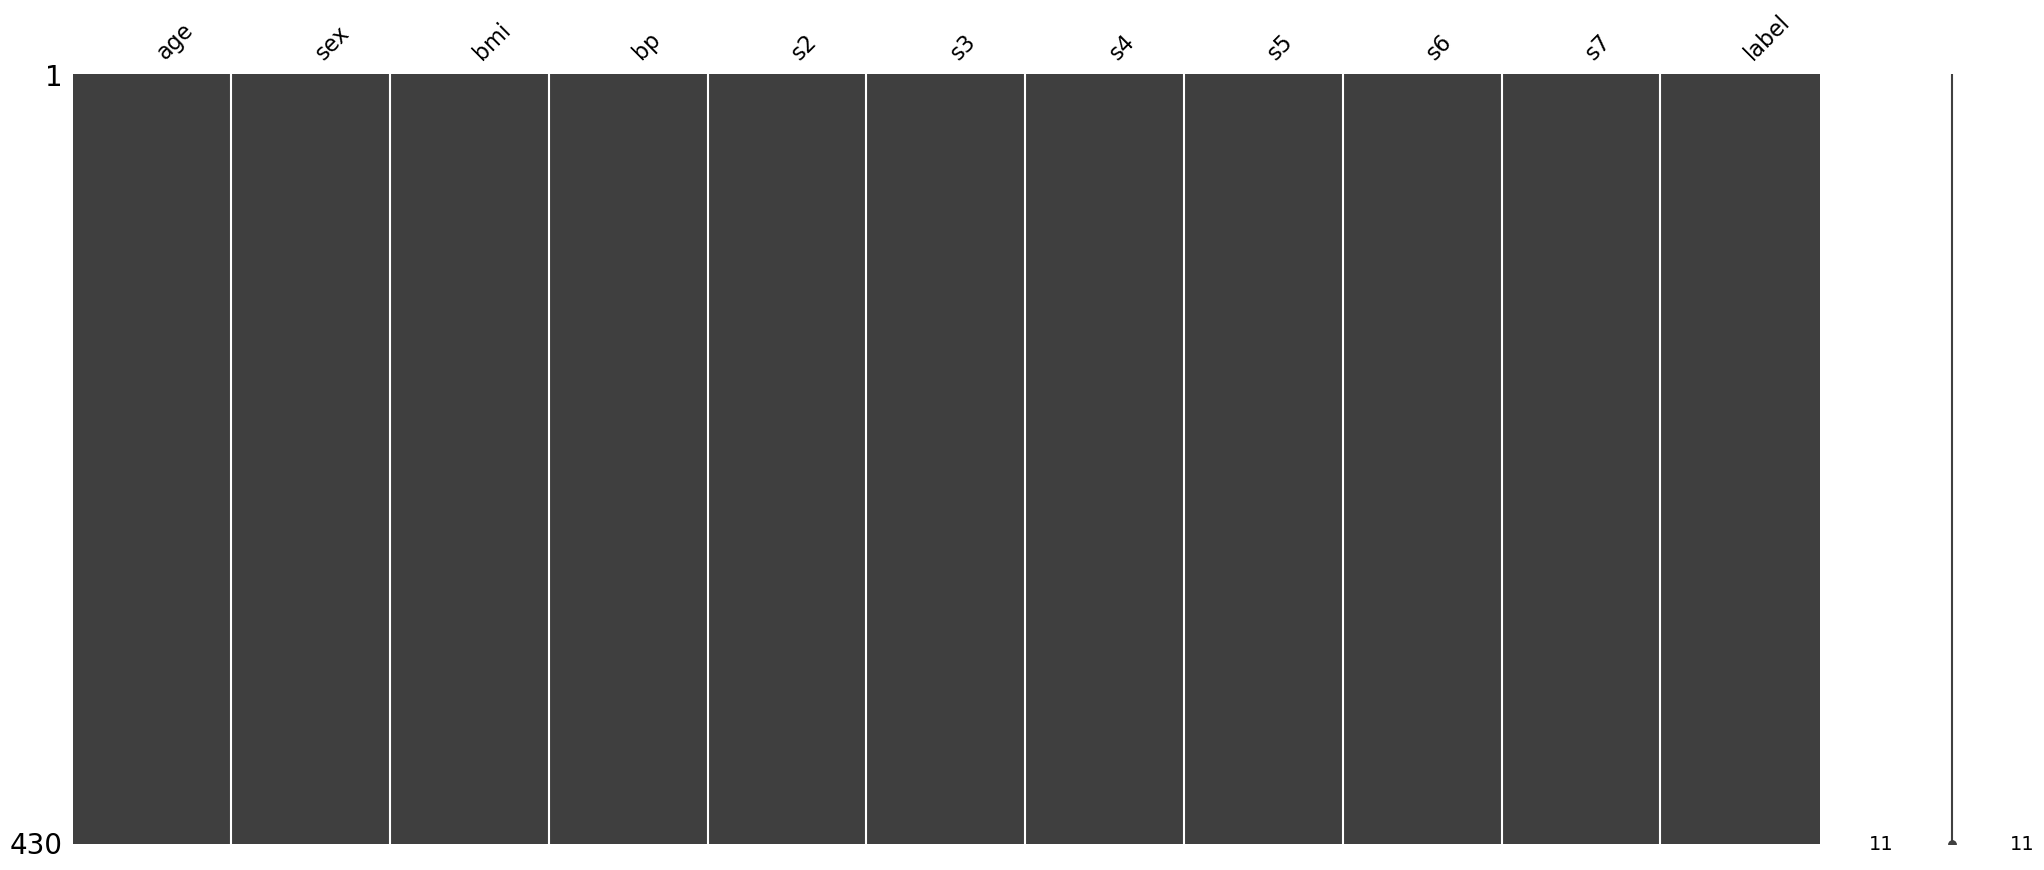

In [58]:
msno.matrix(df)